In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("/content/teams.csv")

In [3]:
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [4]:
df.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [6]:
df.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [7]:
df=df[["team","country","year","athletes","medals","age","prev_medals"]]

In [8]:
df

,team,country,year,athletes,medals,age,prev_medals
0,AFG,Afghanistan,1964,8,0,22.0,0.0
1,AFG,Afghanistan,1968,5,0,23.2,0.0
2,AFG,Afghanistan,1972,8,0,29.0,0.0
3,AFG,Afghanistan,1980,11,0,23.6,0.0
4,AFG,Afghanistan,2004,5,0,18.6,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0,25.0,0.0
2140,ZIM,Zimbabwe,2004,14,3,25.1,0.0
2141,ZIM,Zimbabwe,2008,16,4,26.1,3.0
2142,ZIM,Zimbabwe,2012,9,0,27.3,4.0


In [13]:
df.corr(numeric_only=True)["medals"]

,medals
year,-0.021603
athletes,0.840817
medals,1.000000
age,0.025096
prev_medals,0.920048


In [12]:
import seaborn as sns

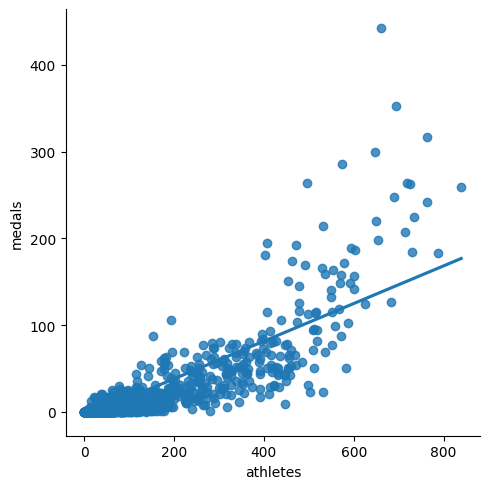

In [17]:
sns.lmplot(x="athletes",y="medals",data=df,fit_reg=True,ci=None)

In [18]:
df[df.isnull().any(axis=1)]

,team,country,year,athletes,medals,age,prev_medals
19,ALB,Albania,1992,9,0,25.3,NaN
26,ALG,Algeria,1964,7,0,26.0,NaN
39,AND,Andorra,1976,3,0,28.3,NaN
50,ANG,Angola,1980,17,0,17.4,NaN
59,ANT,Antigua and Barbuda,1976,17,0,23.2,NaN
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,0,20.5,NaN
2103,YAR,North Yemen,1984,3,0,27.7,NaN
2105,YEM,Yemen,1992,8,0,19.6,NaN
2112,YMD,South Yemen,1988,5,0,23.6,NaN


In [19]:
df=df.dropna()

In [20]:
df

,team,country,year,athletes,medals,age,prev_medals
0,AFG,Afghanistan,1964,8,0,22.0,0.0
1,AFG,Afghanistan,1968,5,0,23.2,0.0
2,AFG,Afghanistan,1972,8,0,29.0,0.0
3,AFG,Afghanistan,1980,11,0,23.6,0.0
4,AFG,Afghanistan,2004,5,0,18.6,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0,25.0,0.0
2140,ZIM,Zimbabwe,2004,14,3,25.1,0.0
2141,ZIM,Zimbabwe,2008,16,4,26.1,3.0
2142,ZIM,Zimbabwe,2012,9,0,27.3,4.0


In [21]:
train=df[df["year"] < 2012].copy()
test =df[df["year"] >= 2012].copy()

In [22]:
train.shape

(1609, 7)

In [23]:
test.shape

(405, 7)

In [24]:
from sklearn.linear_model import LinearRegression
red=LinearRegression()

In [25]:
red.fit(train[["athletes","prev_medals"]],train["medals"])

LinearRegression()

In [26]:
predication =red.predict(test[["athletes","prev_medals"]])

In [28]:
test["predication"]=predication

In [29]:
test


,team,country,year,athletes,medals,age,prev_medals,predication
6,AFG,Afghanistan,2012,6,1,24.8,1.0,-0.961221
7,AFG,Afghanistan,2016,3,0,24.7,1.0,-1.176333
24,ALB,Albania,2012,10,0,25.7,0.0,-1.425032
25,ALB,Albania,2016,6,0,23.7,0.0,-1.711847
37,ALG,Algeria,2012,39,1,24.8,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0,19.3,0.0,-1.926958
2131,ZAM,Zambia,2012,7,0,22.6,0.0,-1.640143
2132,ZAM,Zambia,2016,7,0,24.1,0.0,-1.640143
2142,ZIM,Zimbabwe,2012,9,0,27.3,4.0,1.505767


In [30]:
test.loc[test["predication"] < 0, "predication"]=0

In [31]:
test["predication"] = test["predication"].round()

In [32]:
test

,team,country,year,athletes,medals,age,prev_medals,predication
6,AFG,Afghanistan,2012,6,1,24.8,1.0,0.0
7,AFG,Afghanistan,2016,3,0,24.7,1.0,0.0
24,ALB,Albania,2012,10,0,25.7,0.0,0.0
25,ALB,Albania,2016,6,0,23.7,0.0,0.0
37,ALG,Algeria,2012,39,1,24.8,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0,19.3,0.0,0.0
2131,ZAM,Zambia,2012,7,0,22.6,0.0,0.0
2132,ZAM,Zambia,2016,7,0,24.1,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,0,27.3,4.0,2.0


In [34]:
from sklearn.metrics import mean_absolute_error as mae
error= mae(test["medals"],test["predication"])

In [35]:
error

3.2987654320987656

In [36]:
test[test["team"]=="IND"]

,team,country,year,athletes,medals,age,prev_medals,predication
907,IND,India,2012,95,6,26.0,3.0,7.0
908,IND,India,2016,130,2,26.1,6.0,12.0


In [37]:
errors = (test["medals"] - prediction).abs()

NameError: name 'predictions' is not defined

In [43]:
errors = (test["medals"] - predication).abs()

In [44]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team

In [45]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]


<Axes: ylabel='Frequency'>

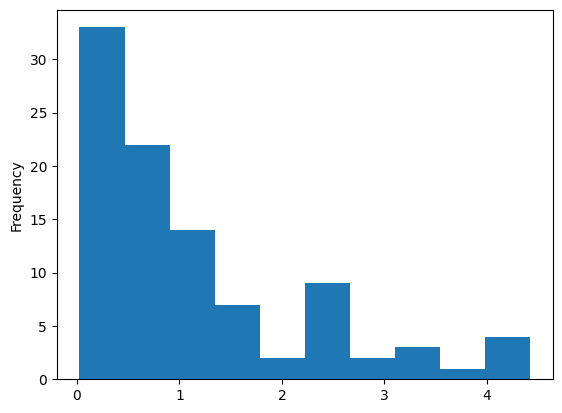

In [46]:

error_ratio.plot.hist()

In [47]:
error_ratio.sort_values()

,medals
team,
FRA,0.024289
CAN,0.050844
NZL,0.071349
RUS,0.081841
ITA,0.119537
...,...
PHI,3.563248
JOR,4.065175
BDI,4.136878
